In [1]:
import pennylane as qml

from NQE_analysis import get_circuit, get_circuit_by_energy

In [2]:
def draw_pennylane_circuit(circuit_value):
    each_energy = circuit_value['energy']
    each_circuit = circuit_value['gen_op_seq']

    def _get_value(x):
        try:
            return x[1]
        except TypeError:
            return x

    @qml.qnode(dev)
    def circuit():
        for gate, param_and_scale, (control, target) in each_circuit:
            if gate == "RX":
                qml.RX(_get_value(param_and_scale), wires=control)
            elif gate == "RY":
                qml.RY(_get_value(param_and_scale), wires=control)
            elif gate == "RZ":
                qml.RZ(_get_value(param_and_scale), wires=control)
            elif gate == "MultiRZ":
                qml.MultiRZ(_get_value(param_and_scale), wires=[control, target])
            elif gate == "CNOT":
                qml.CNOT(wires=[control, target])
            elif gate == "H":
                qml.Hadamard(wires=control)
            elif gate == "I":
                qml.Identity(wires=control)
        return qml.state()

    fig, ax = qml.draw_mpl(circuit, show_all_wires=True, decimals=1, expand=False)()
    fig.set_size_inches(16, 6)
    fig.suptitle(f"Energy: {each_energy:.6f}", fontsize=14)
    return fig

In [3]:
circuit_filename = 'fix_sample_SM_more_gate_generated_circuit.json'
n_circuit = 50
dev = qml.device("default.qubit", wires=4)

In [4]:
circuits = get_circuit(circuit_filename)

getting circuit...


In [5]:
good_circuits = get_circuit_by_energy(circuits, 'top', n_circuit=n_circuit)
bad_circuits = get_circuit_by_energy(circuits, 'bottom', n_circuit=n_circuit)

extracting top...
extracting bottom...


# Good Circuits

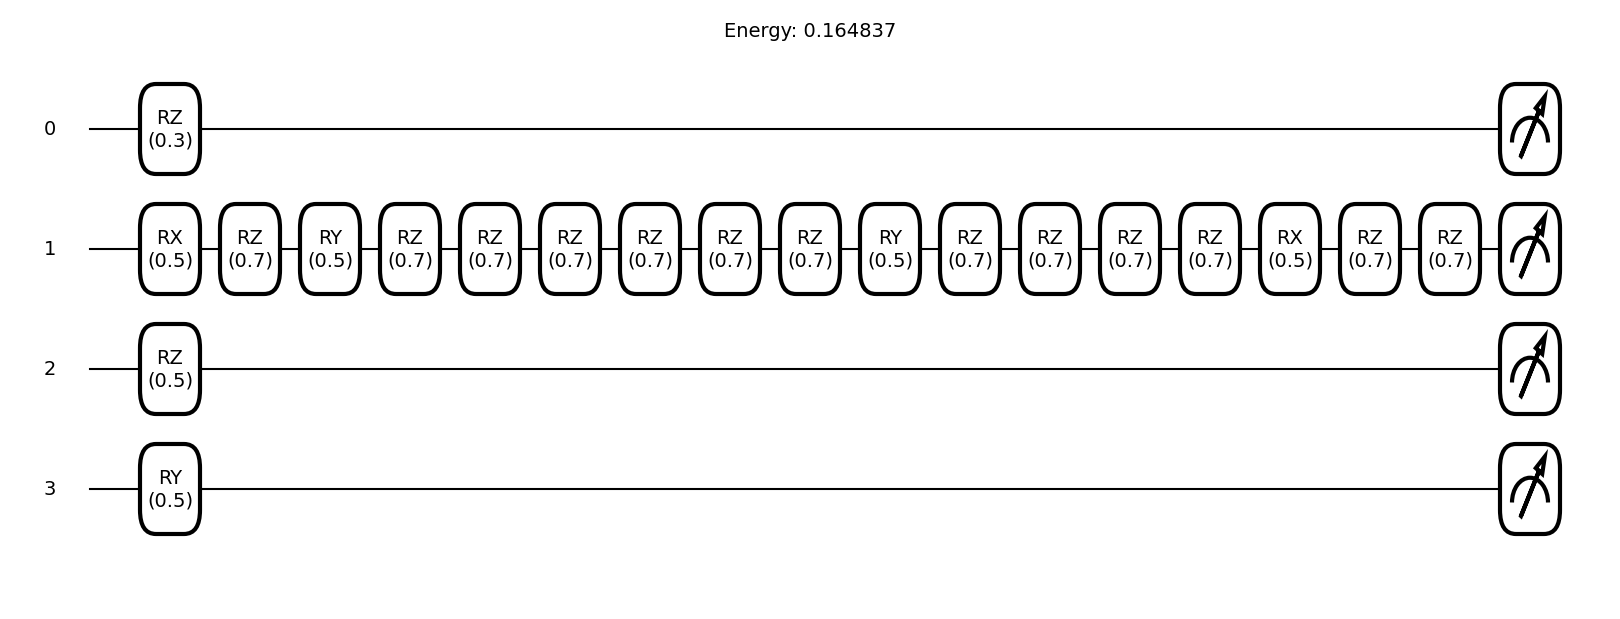

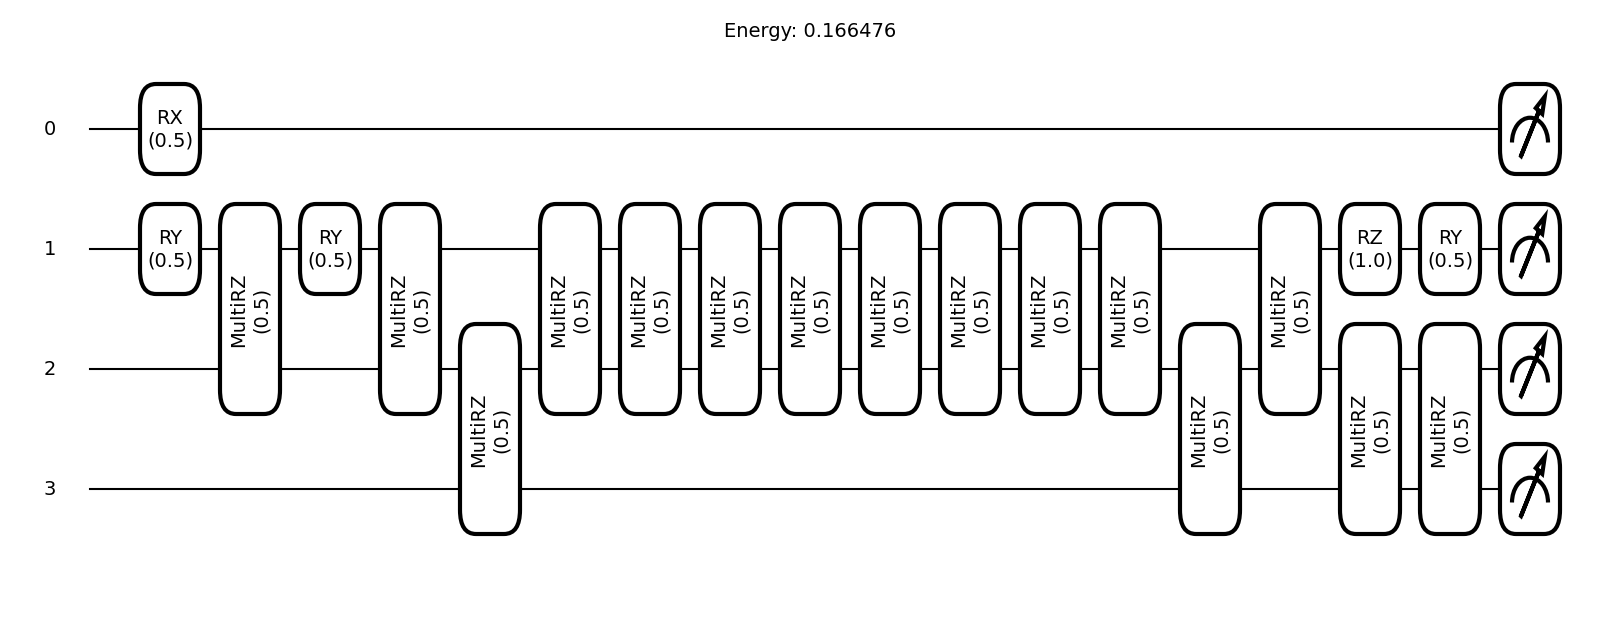

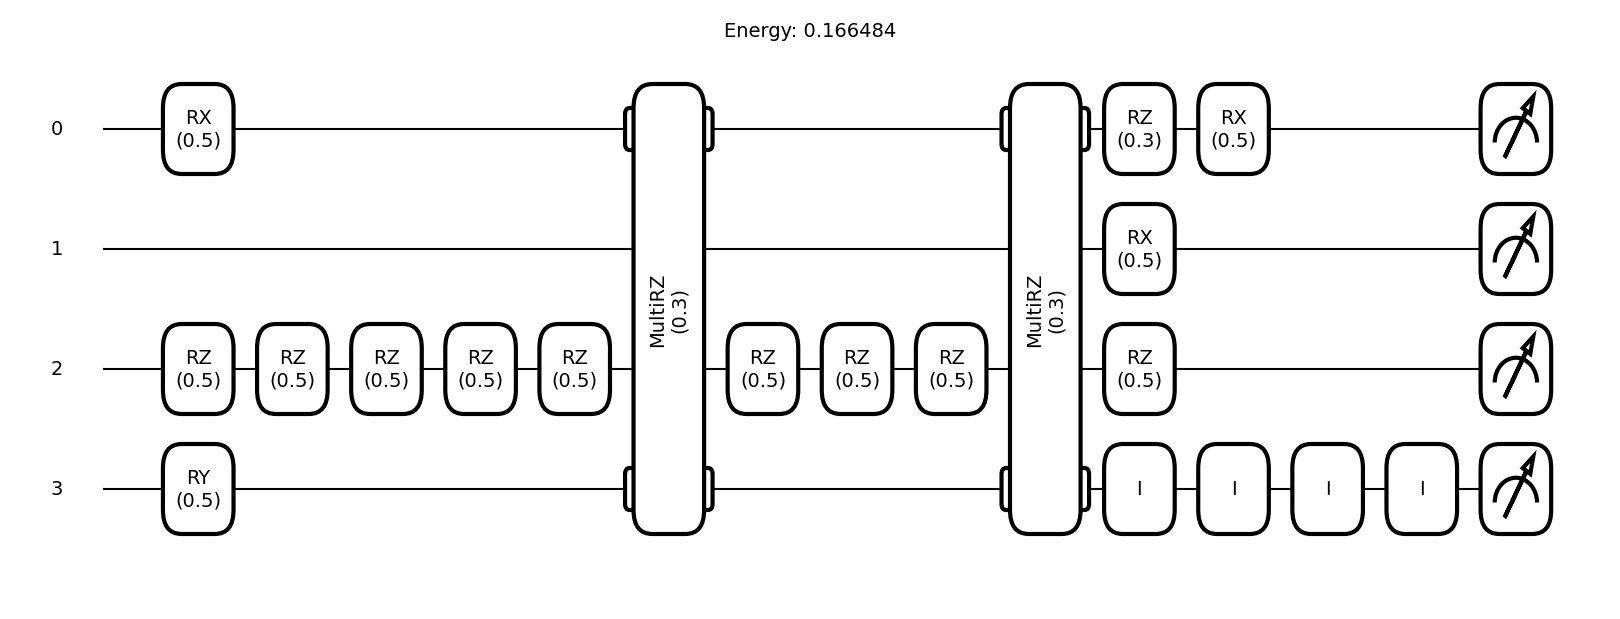

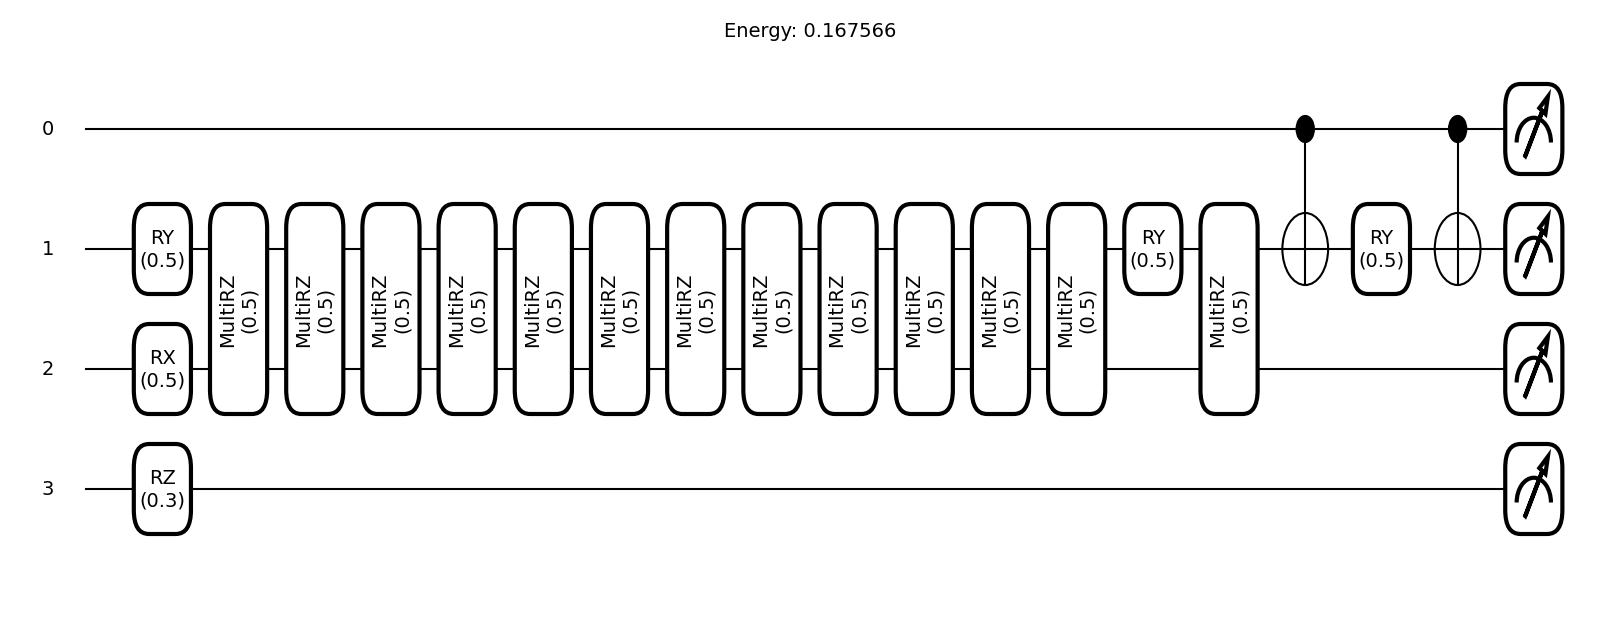

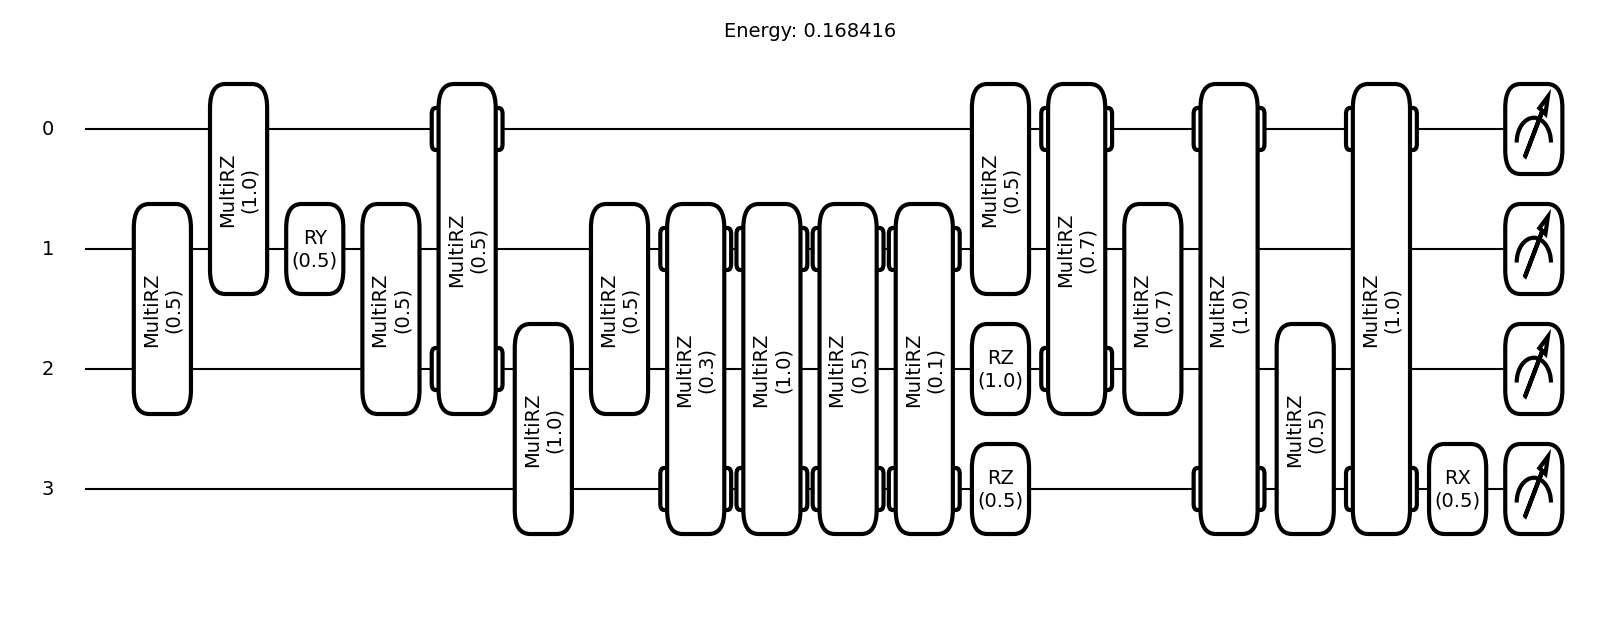

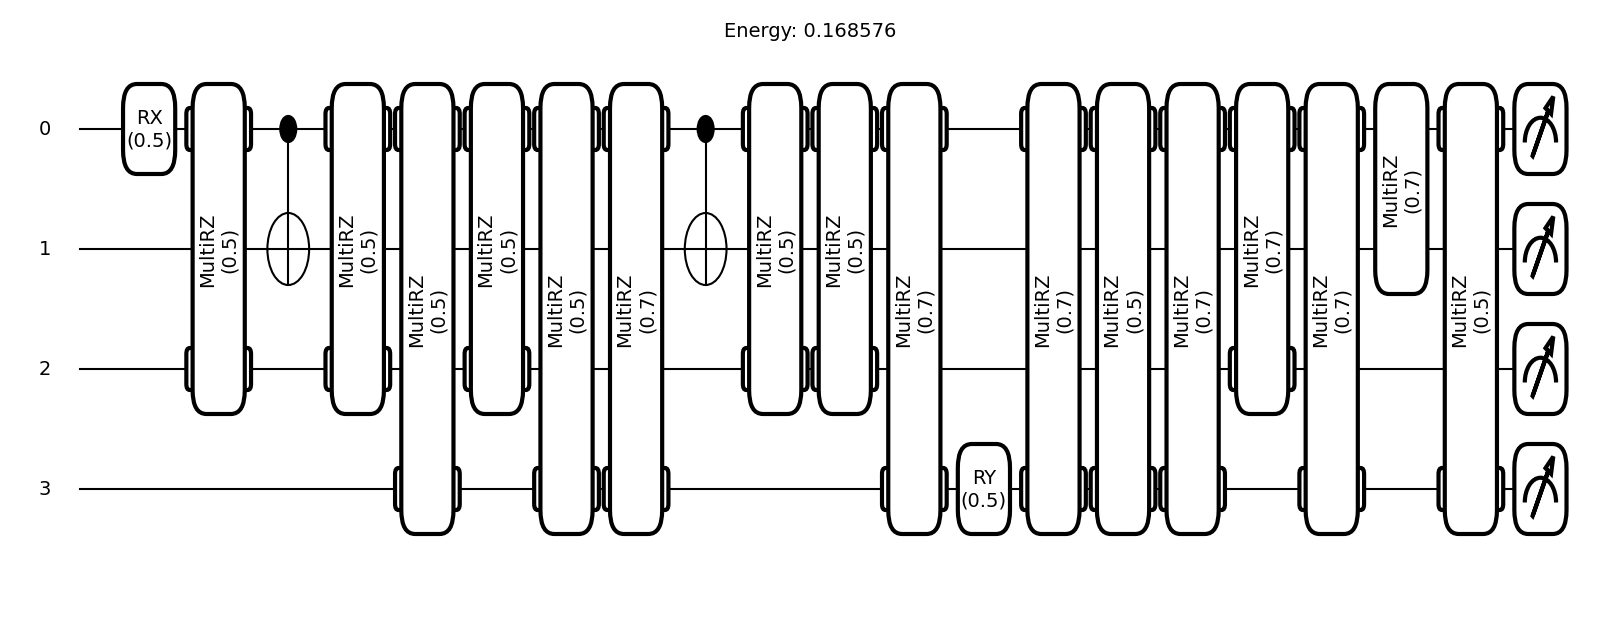

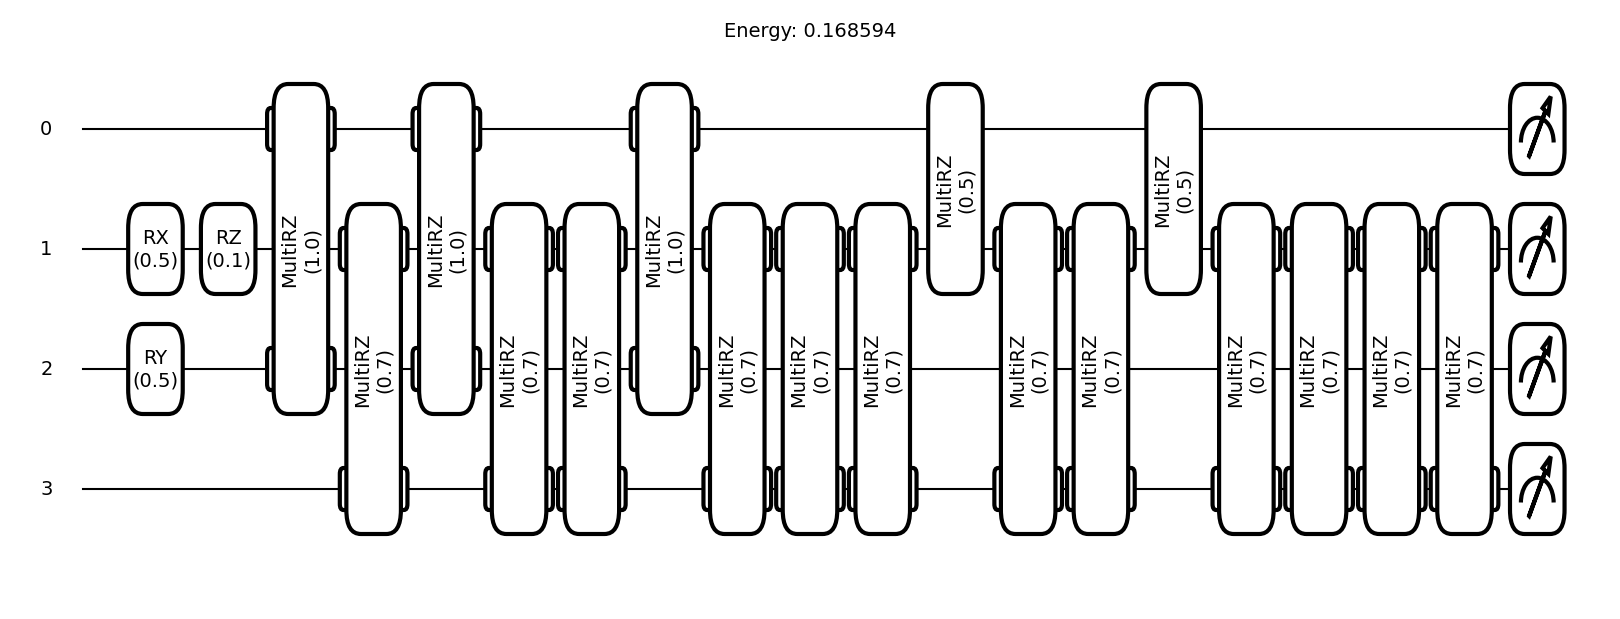

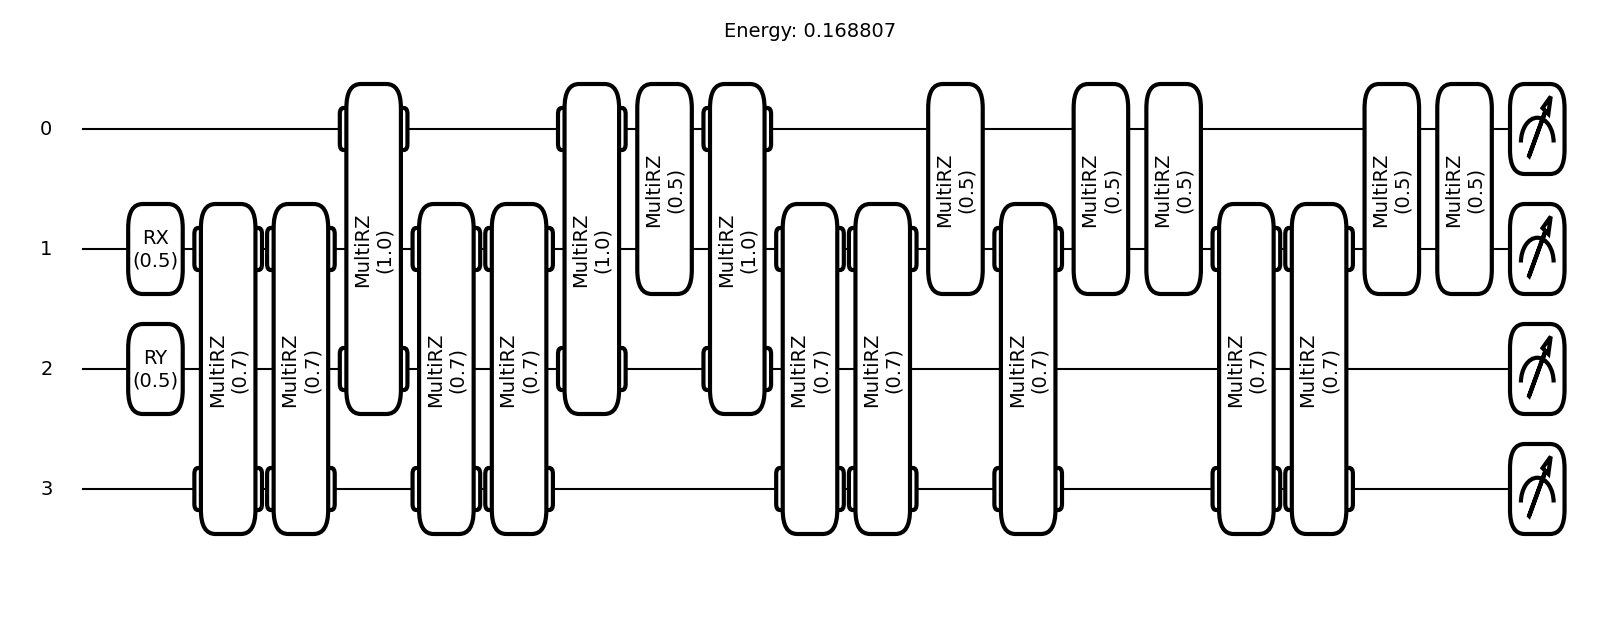

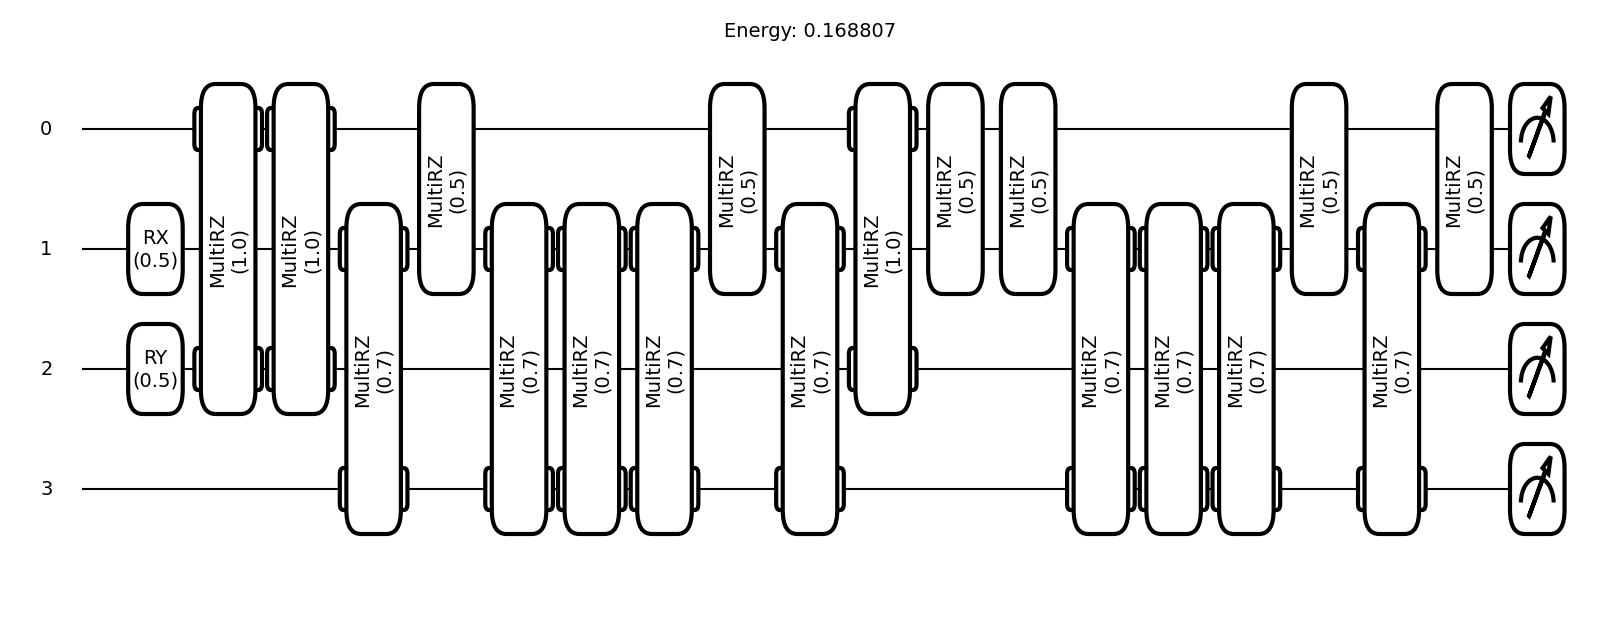

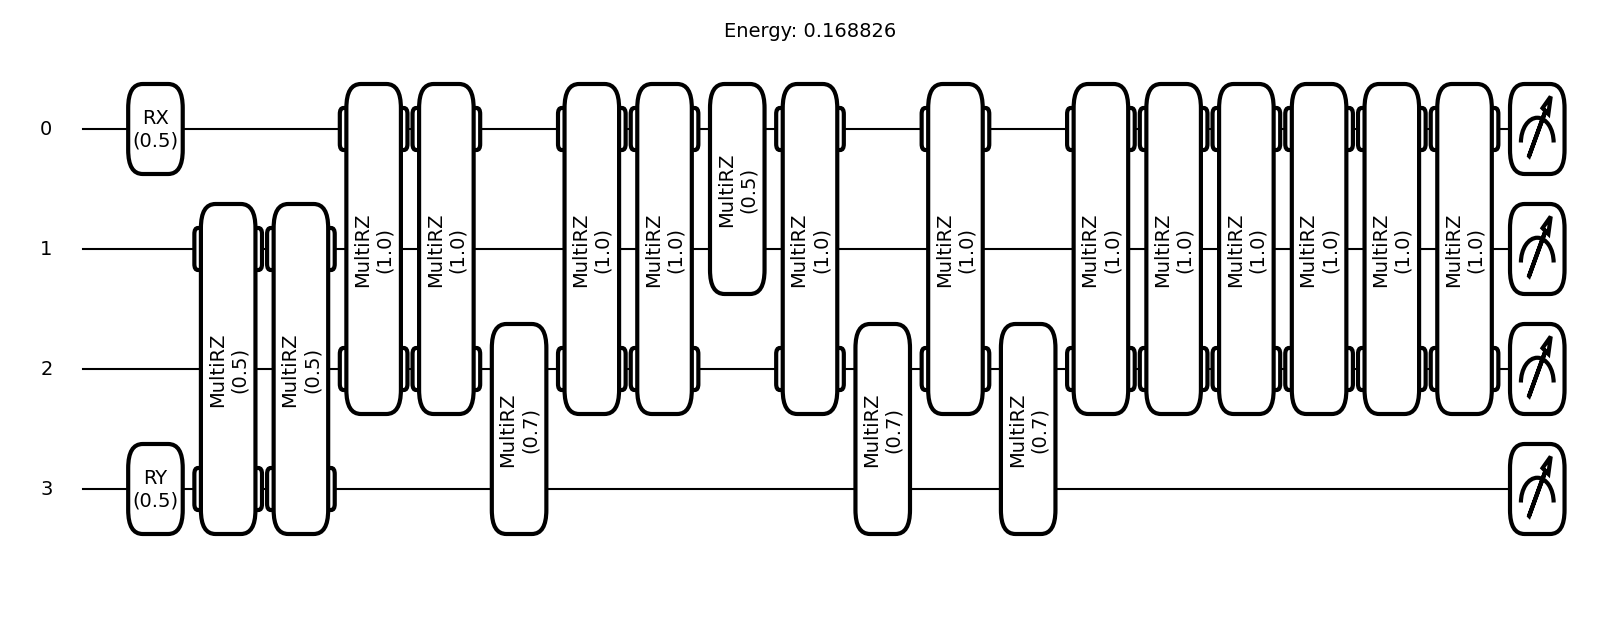

In [8]:
for i in range(10):
    draw_pennylane_circuit(good_circuits.iloc[i])

# Bad Circuits

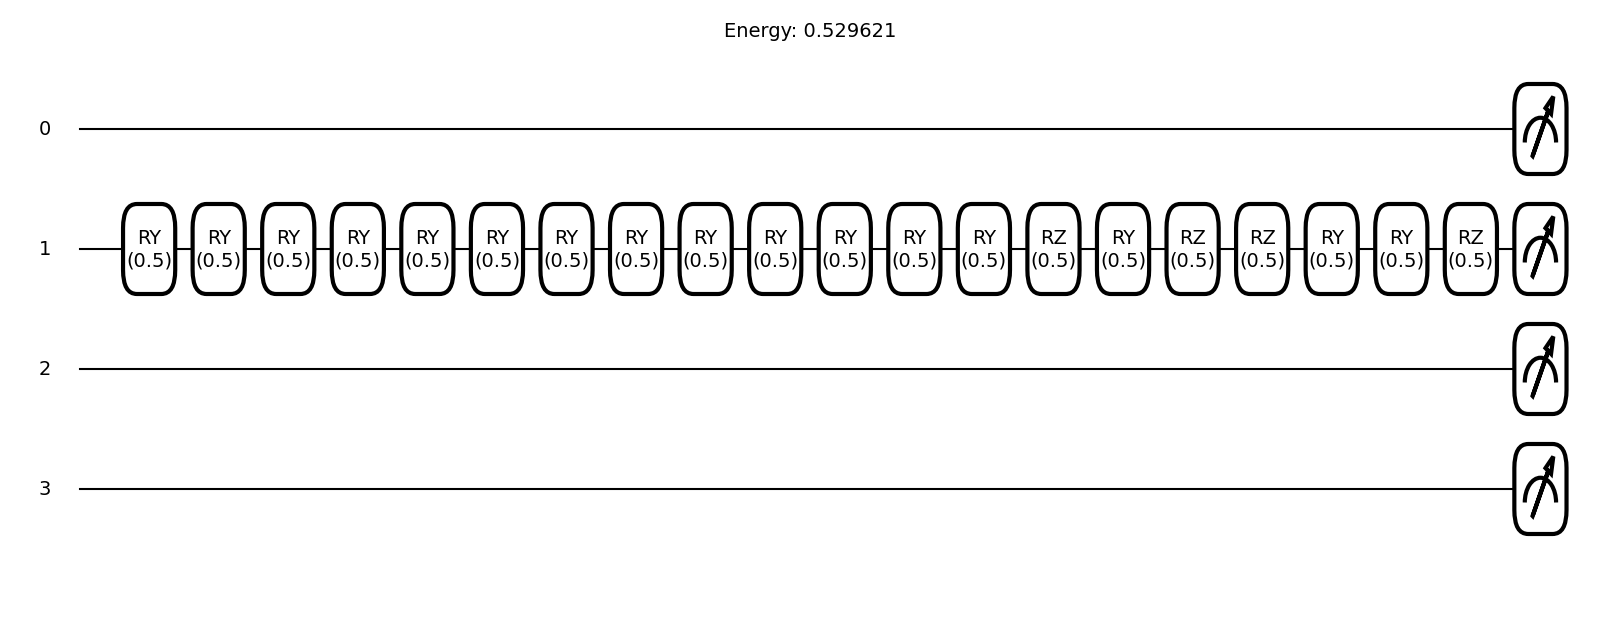

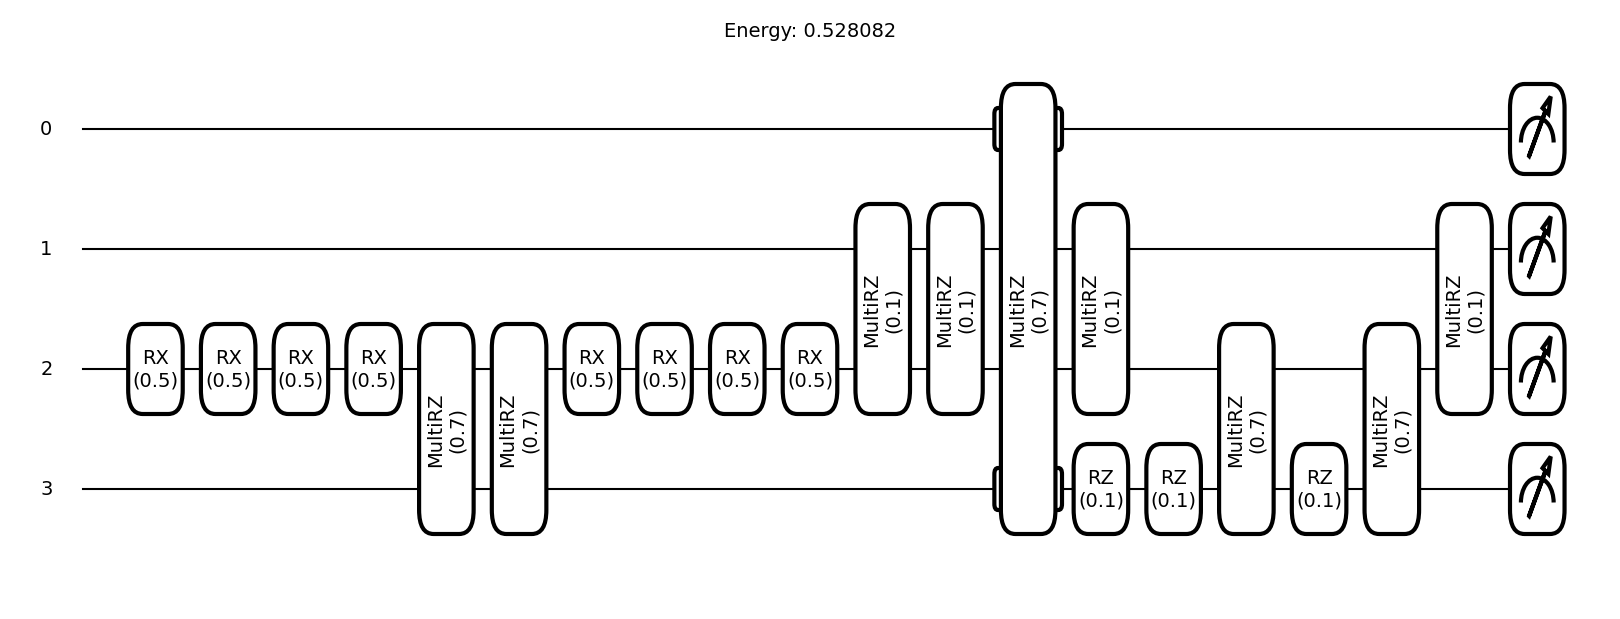

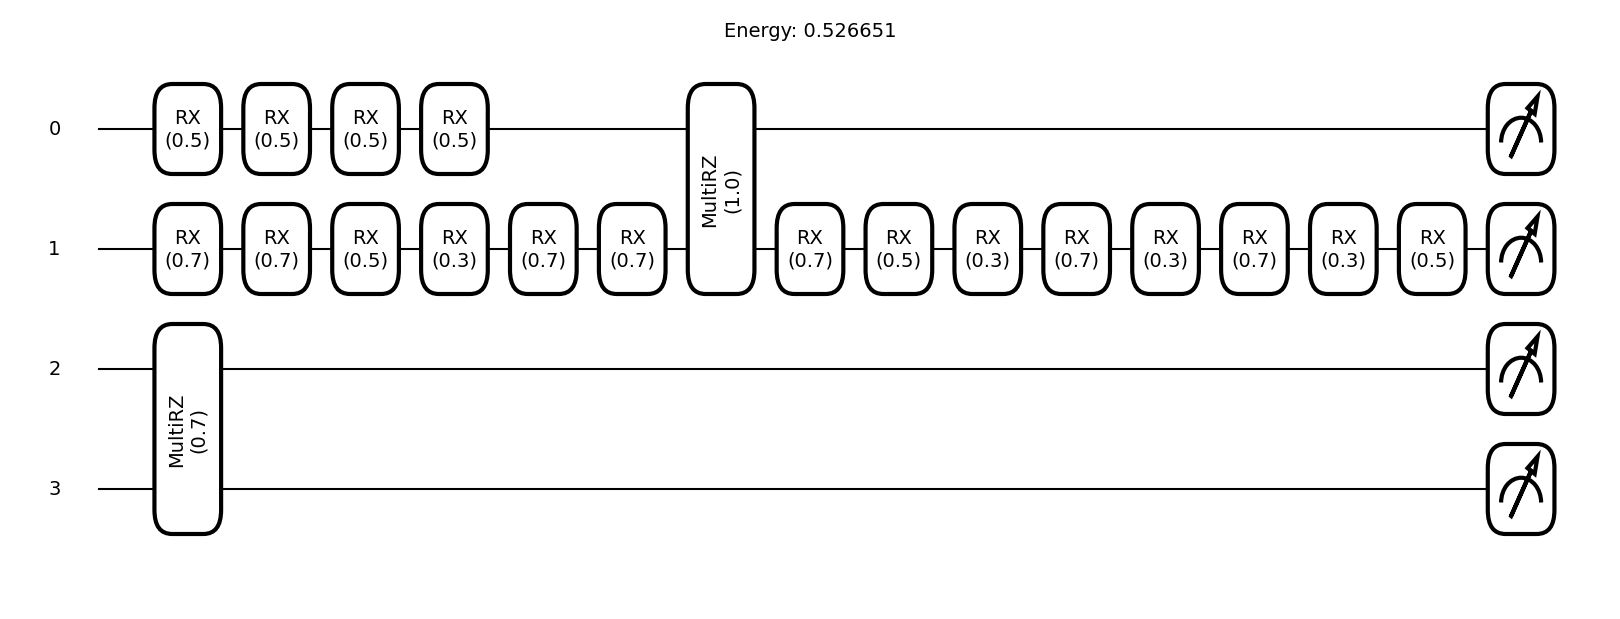

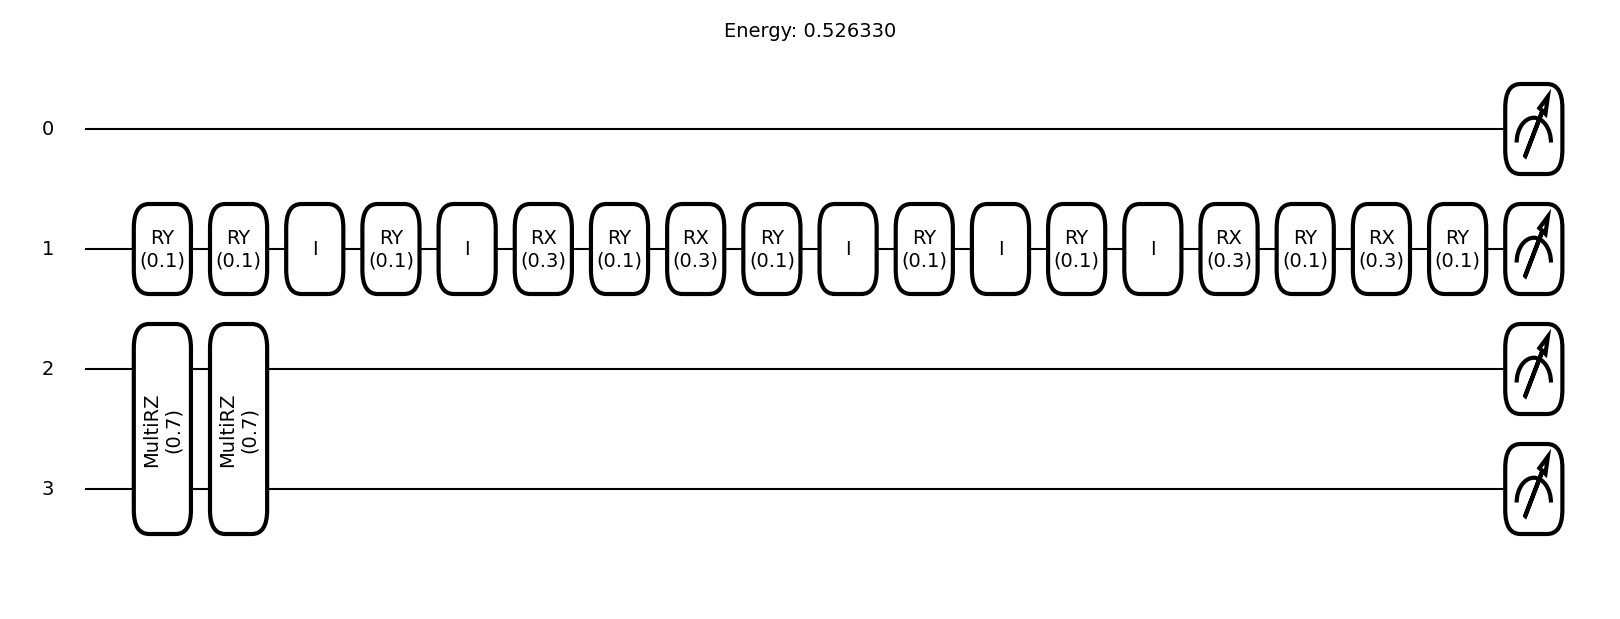

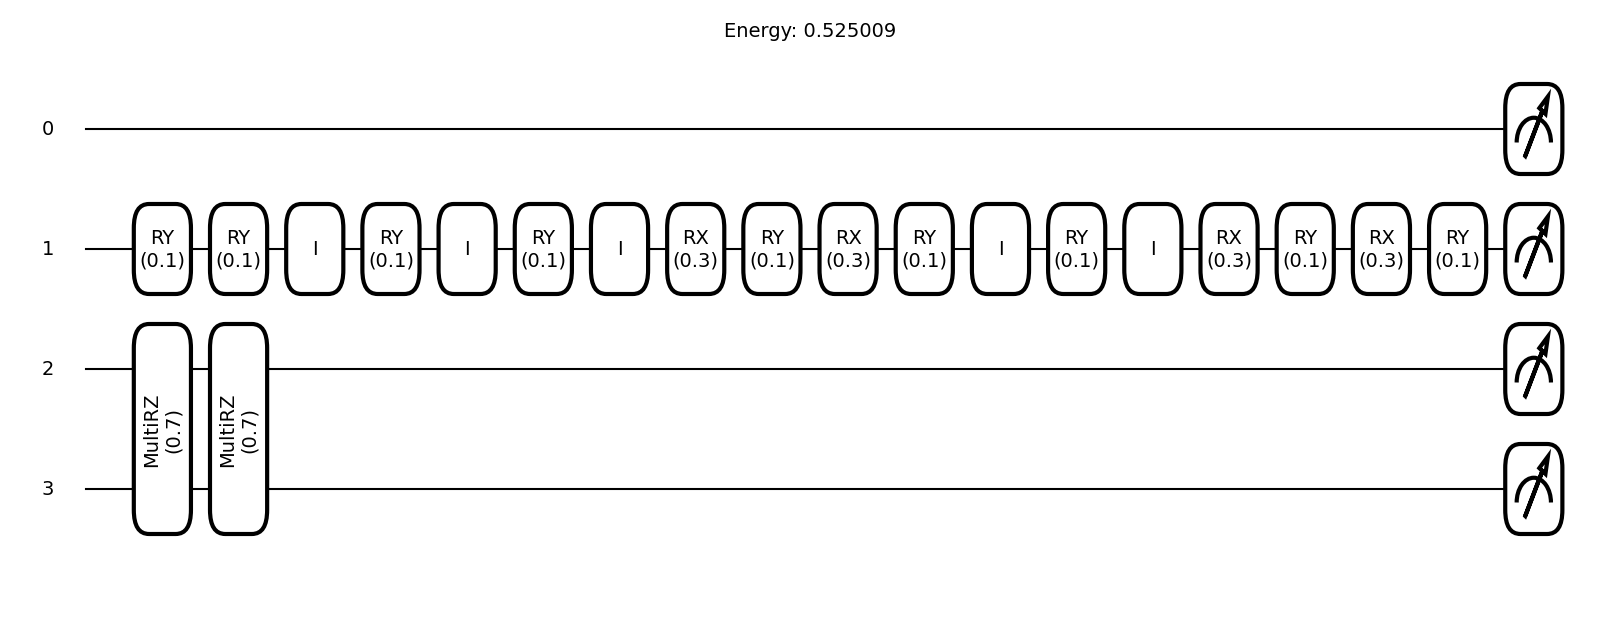

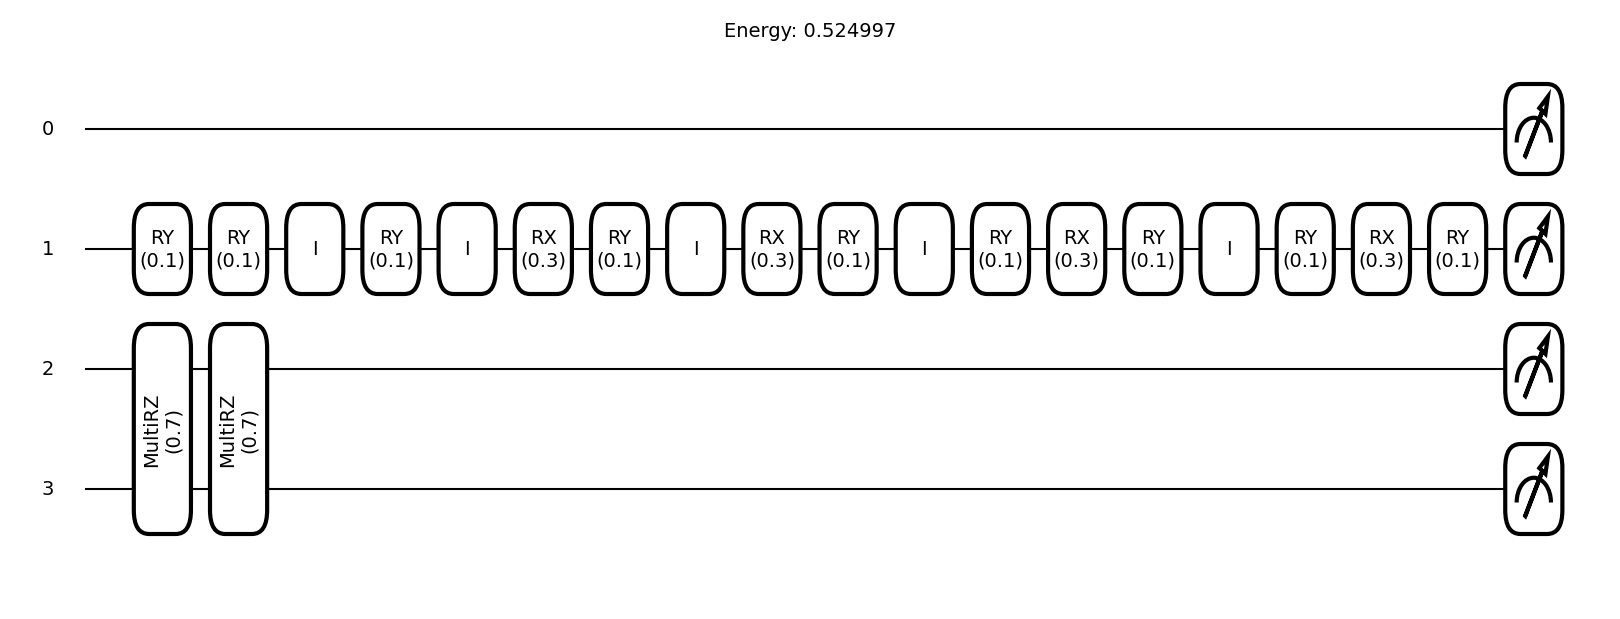

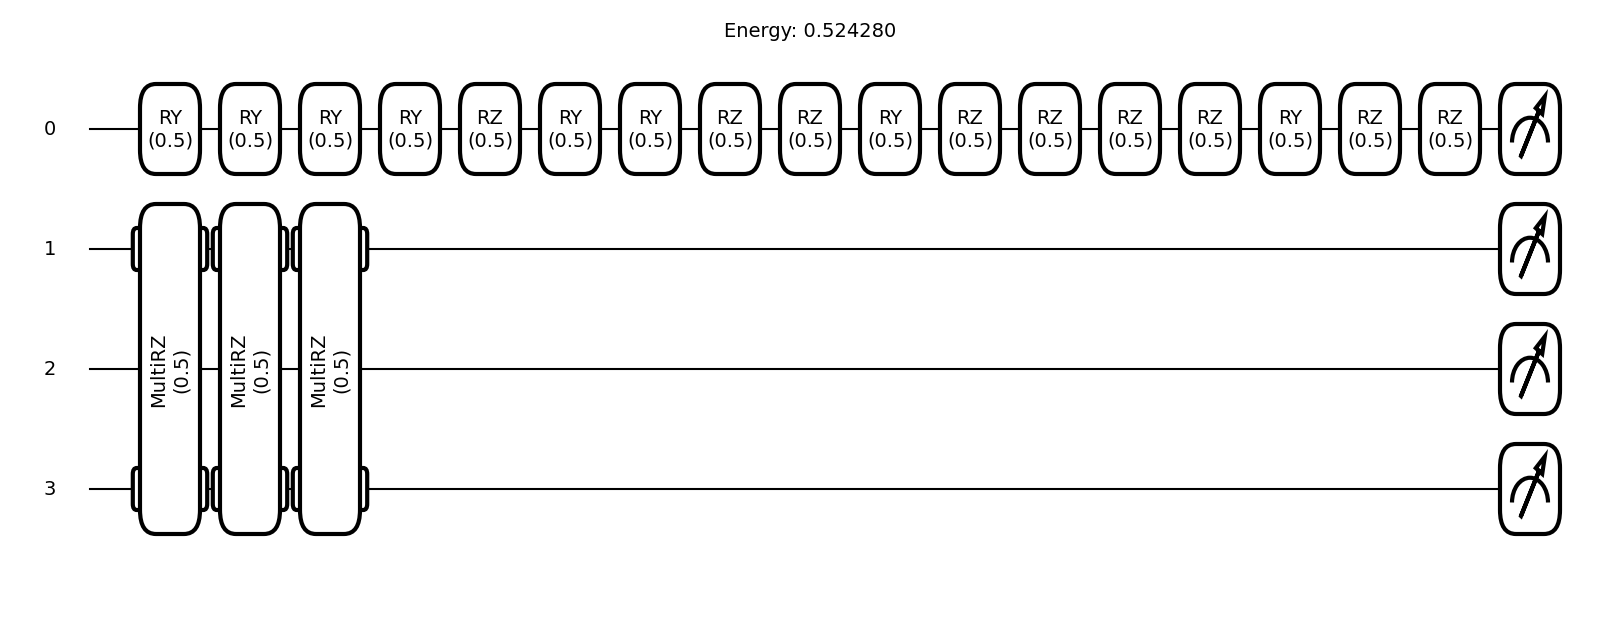

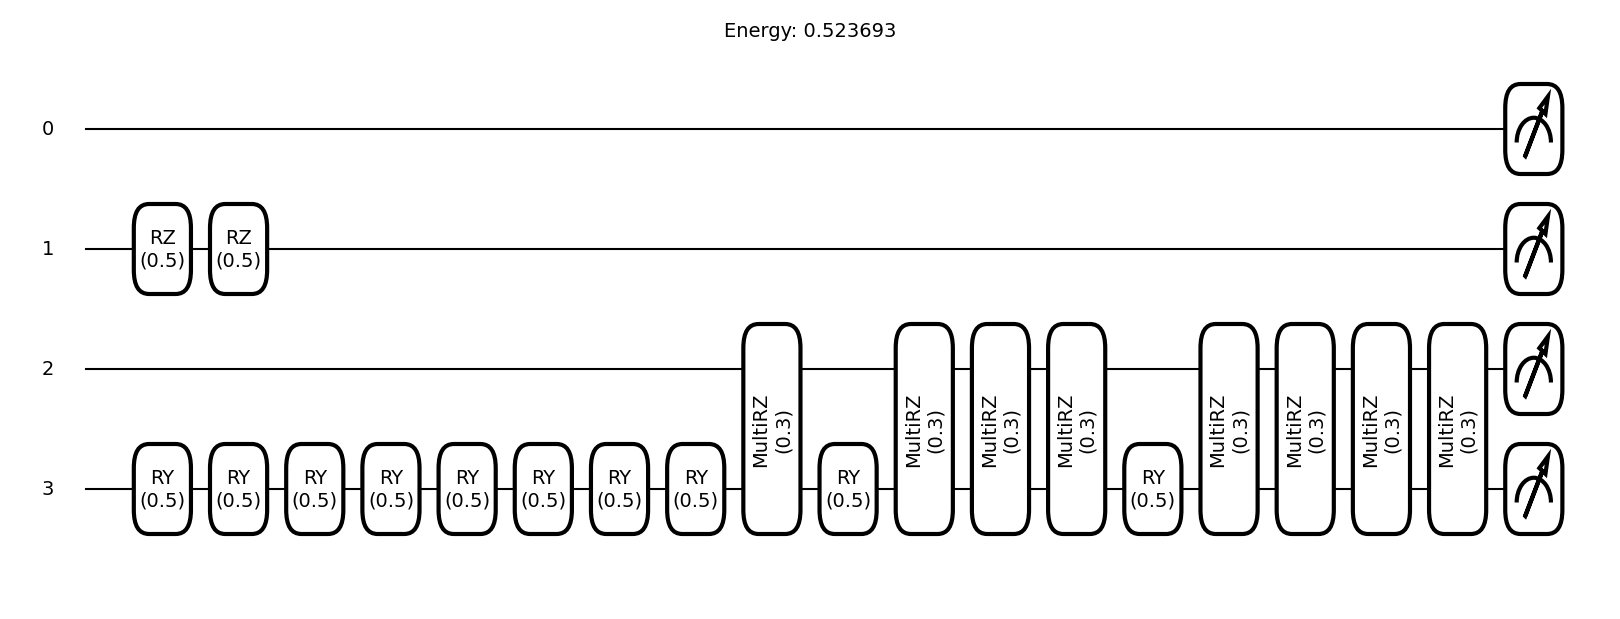

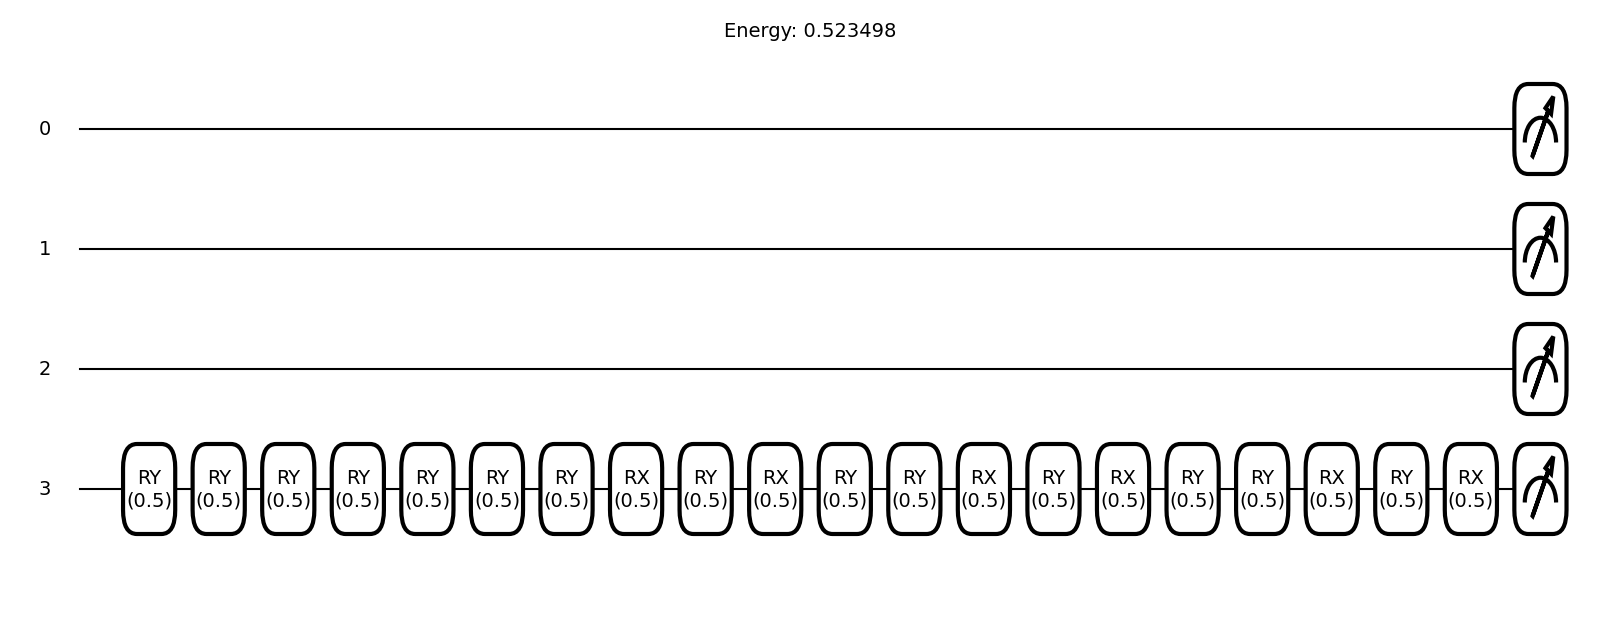

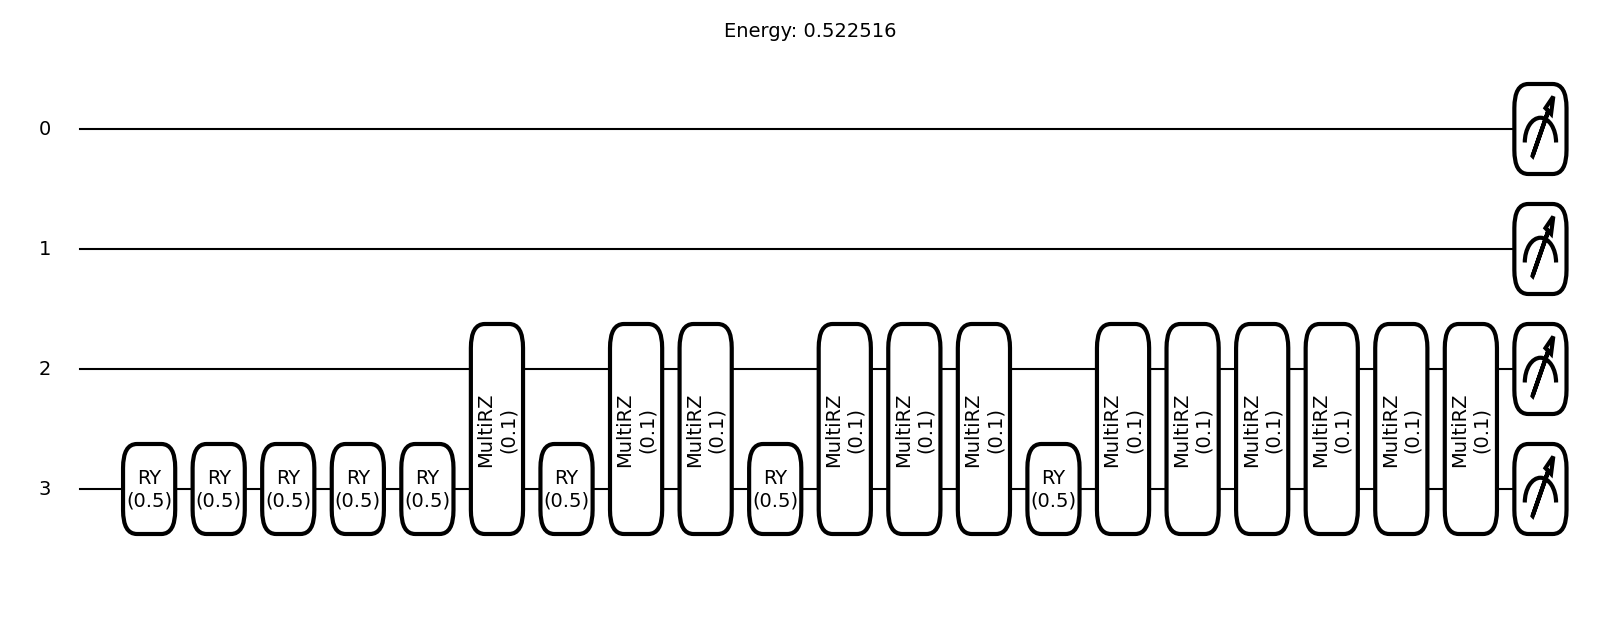

In [9]:
for i in range(10):
    draw_pennylane_circuit(bad_circuits.iloc[i])